In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("wine.csv")

In [5]:
df.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


<h2>Let's do a bit of Exploratory Analysis on the data</h2>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

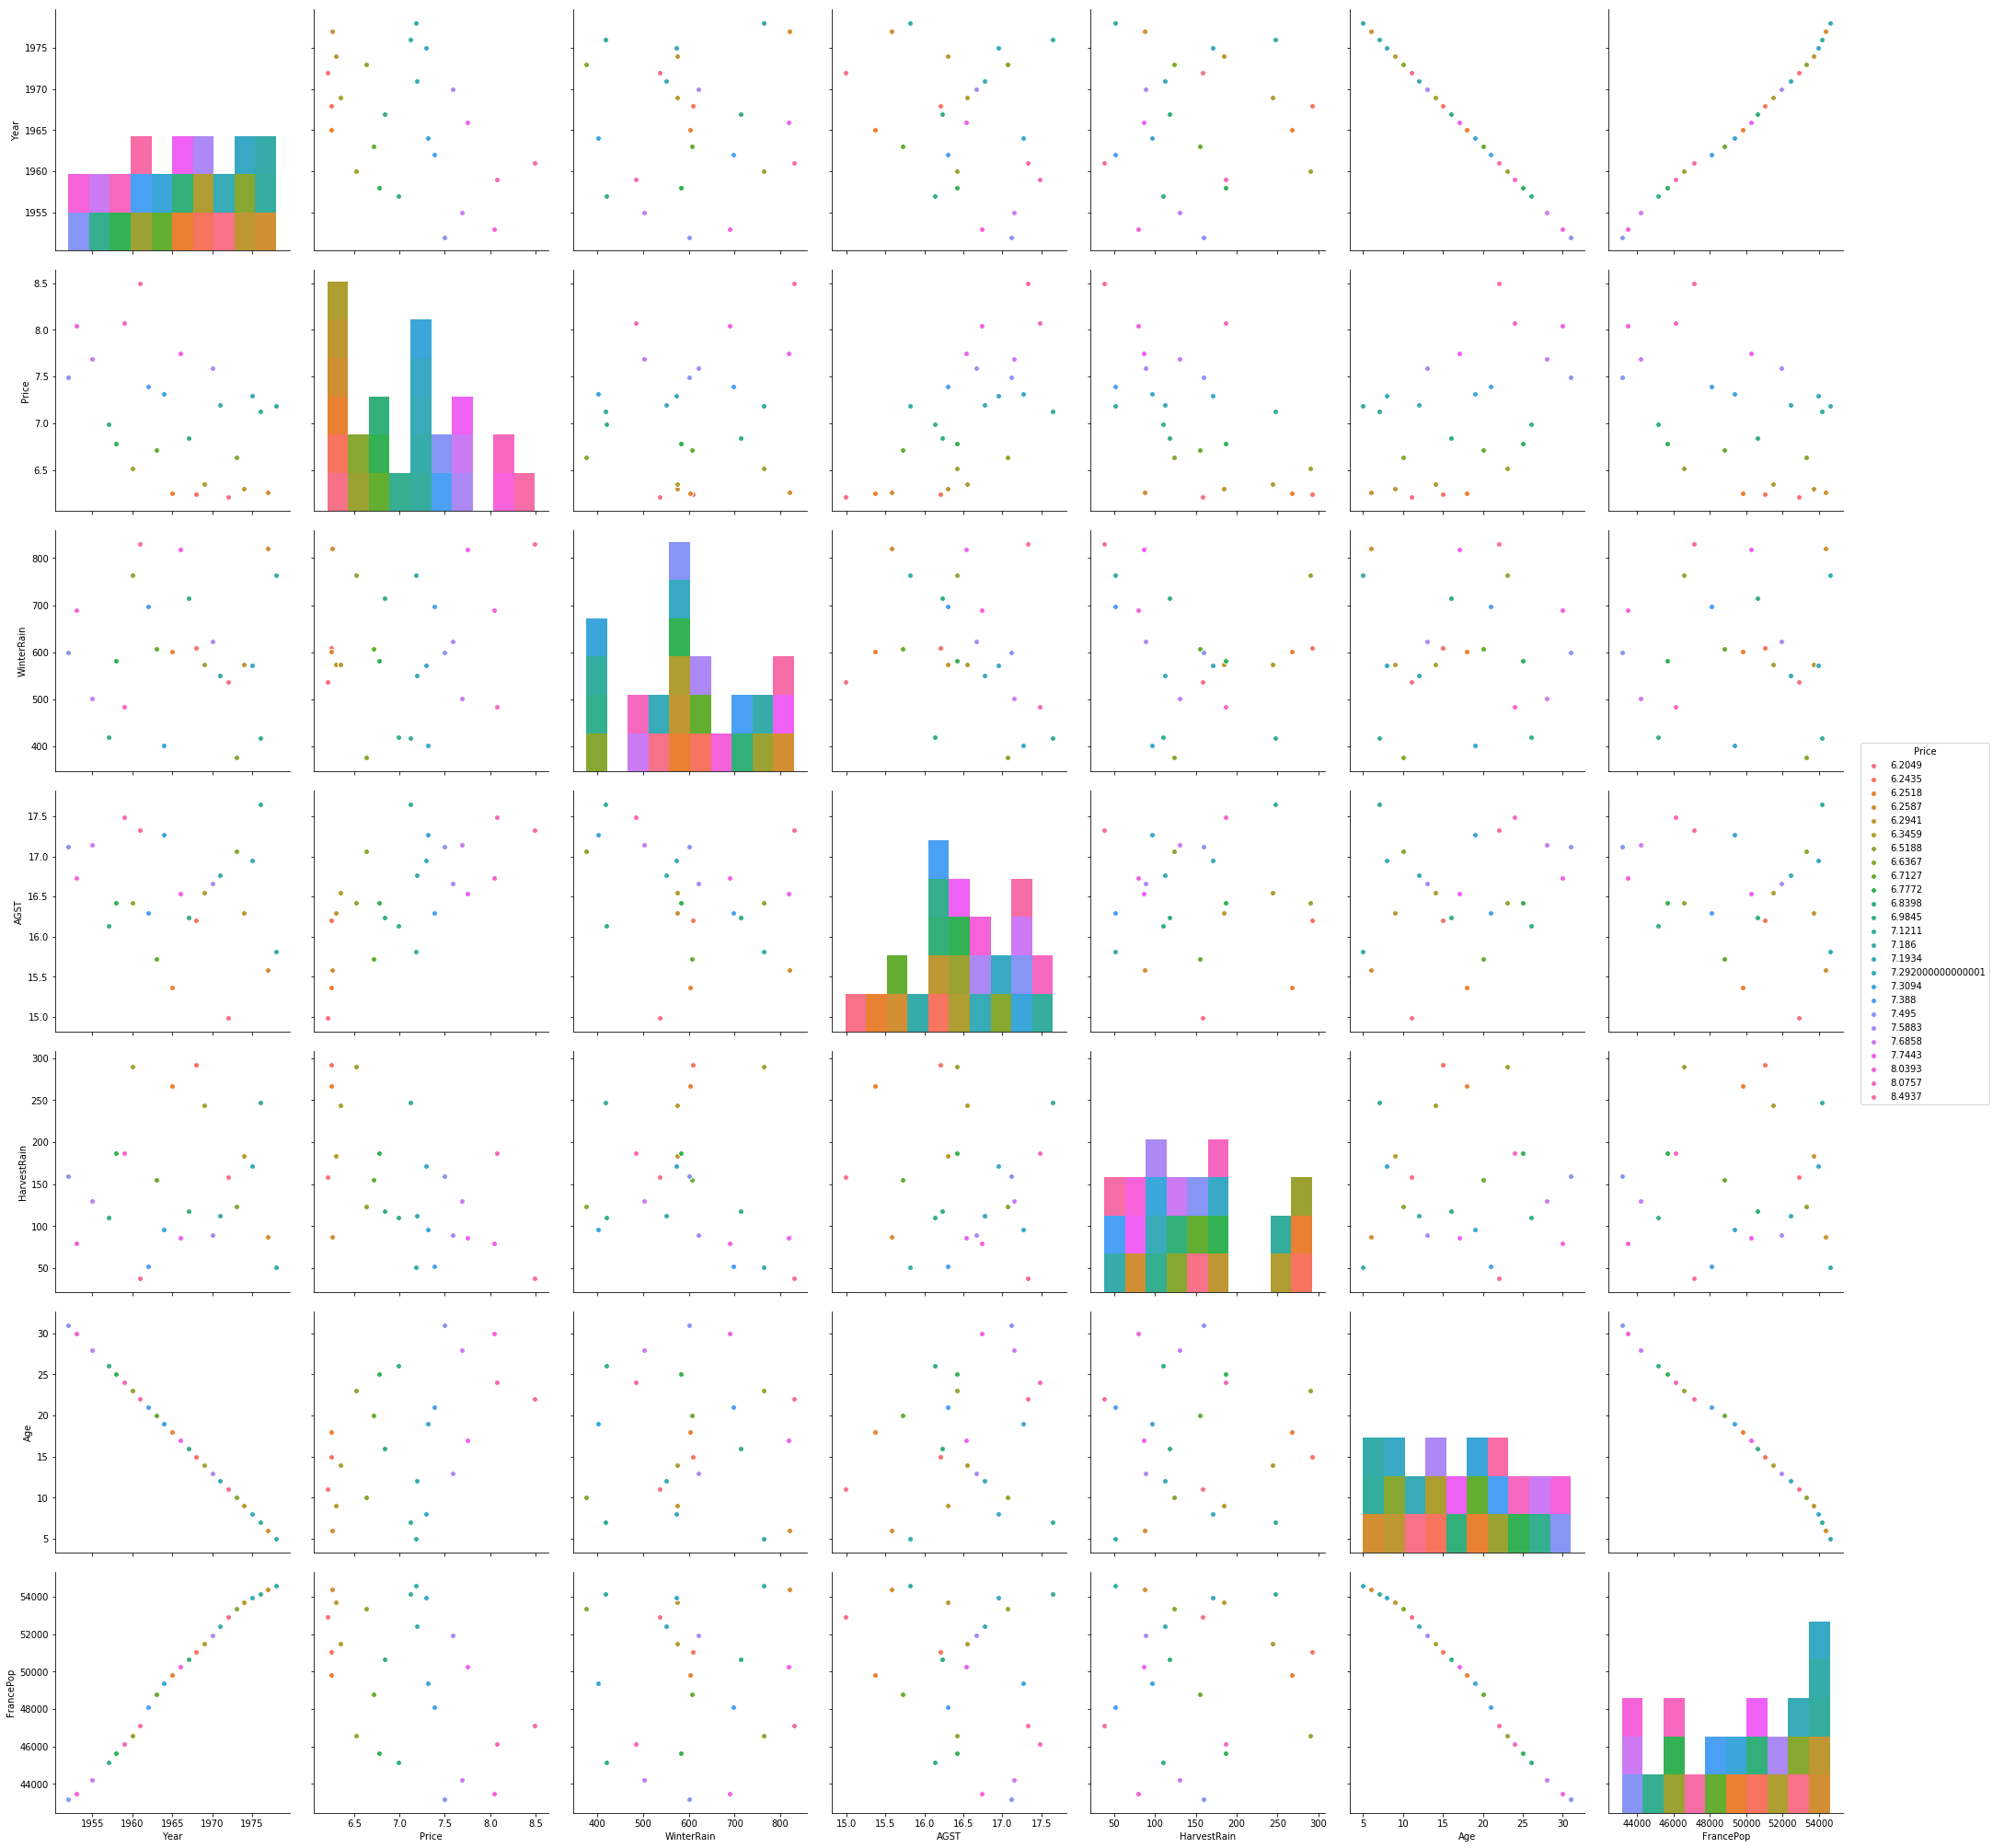

In [22]:
sns.pairplot(df,hue="Price",size=4)
plt.show()

<h4>Let's understand the correlation of price with remaining attributes</h4>

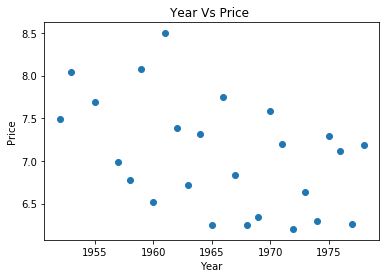

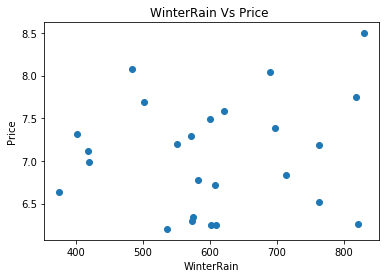

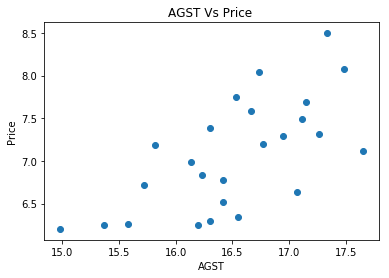

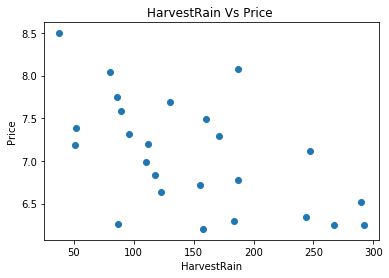

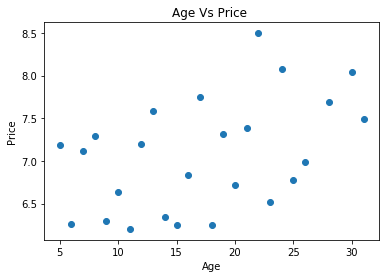

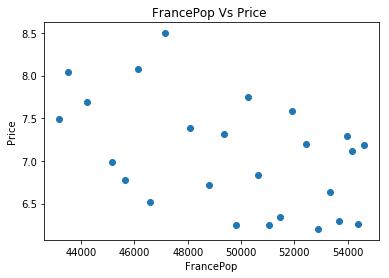

In [20]:
a=list(df)
a.remove("Price")
for i in a:
    plt.scatter(df[i],df['Price'])
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title(i+" Vs Price ")
    plt.show()

<h3>As we can see the features are weakly coorelated with Price.Knowing this we will take features that are correlated with the price</h3>

In [23]:
df.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


Features that are required in building a model are :
1.Year
2.AGST
3.HarvestRain
4.Age
5.FrancePop

In [28]:
from sklearn.linear_model import LinearRegression
a

['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age', 'FrancePop']

In [29]:
a

['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age', 'FrancePop']

In [38]:
df.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


In [39]:
df.shape

(25, 7)

In [36]:
model_1 = LinearRegression().fit(df[a].values,df["Price"].values)
pred_1 = model_1.predict(df[a].values)

In [41]:
pred_1

array([7.71213562, 7.87609138, 7.6957547 , 7.03071975, 7.03979179,
       7.55583208, 6.7735594 , 8.36440845, 7.50093262, 6.61400396,
       7.53645527, 5.9031736 , 7.5241781 , 7.08751791, 6.25075921,
       6.59251793, 7.3024093 , 7.17147181, 5.8780449 , 7.08005949,
       6.56581556, 6.9922508 , 6.94105535, 6.74048938, 6.95117163])

In [43]:
from sklearn.metrics import r2_score

In [44]:
ans = r2_score(df["Price"].values,pred_1)

In [45]:
ans

0.8293592223299044

In [67]:
import numpy as np
SSE = np.sum(np.square((df["Price"].values)-(pred_1)))
SST = np.sum(np.square(df["Price"].values-np.mean(df["Price"].values)))
R2 = 1-(SSE/SST)

In [68]:
R2

0.8293592223299044

<h3>France Population and Year are very much negatively correlated with the prices and are highly correlated with them will remove them build our final model</h3>

In [69]:
model_2 = LinearRegression().fit(df[["WinterRain","AGST","HarvestRain","Age"]].values,df["Price"].values)
pred_2 = model_1.predict(df[a].values)

In [70]:
ans= r2_score(df["Price"].values,pred_2)

In [71]:
ans

0.8293592223299044

In [72]:
SSE = np.sum((df["Price"].values-pred_2)**2)
SST = np.sum((df['Price'].values-np.mean(df["Price"].values))**2)
R2 = 1-(SSE/SST)

In [73]:
R2

0.8293592223299044